In [2]:
!nvidia-smi

Wed Nov  8 15:02:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [15]:
import torch
torch.cuda.is_available()

True

In [ ]:
################################################################################
# INSTALL CONDA ON GOOGLE COLAB
	################################################################################
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.12.0-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.12.0-Linux-x86_64.sh -b -f -p /usr/local/

In [11]:
!which conda
!conda --version

/usr/local/bin/conda
conda 4.12.0


In [ ]:
!git clone https://github.com/princeton-vl/RAFT-Stereo.git

Upload
* test images
* pre-trained model (e.g., `raftstereo-middlebury.pth`)

In [28]:
# !pip install torchvision
# !pip install matplotlib
# !pip install tensorboard
# !pip install scipy
# !pip install tqdm
# !pip install opt_einsum
# !pip install imageio
# !pip install scikit-image
# !pip install torch
# !pip install scipy
# !pip install Pillow
!pip install matplotlib

     |████████████████████████████████| 11.2 MB 10.1 MB/s 
     |████████████████████████████████| 53 kB 1.5 MB/s 
     |████████████████████████████████| 247 kB 54.5 MB/s 
     |████████████████████████████████| 15.7 MB 53.0 MB/s 
     |████████████████████████████████| 965 kB 55.8 MB/s 
     |████████████████████████████████| 1.1 MB 58.0 MB/s 
     |████████████████████████████████| 103 kB 67.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.16.6
    Uninstalling numpy-1.16.6:
      Successfully uninstalled numpy-1.16.6


In [ ]:
!conda install cudatoolkit=10.2.89
!conda install opencv
!conda install p7zip
!conda install opt_einsum

In [36]:
# %cd RAFT-Stereo

!python demo.py --restore_ckpt raftstereo-sceneflow.pth --corr_implementation alt --mixed_precision -l=img/roses_L.png -r=img/roses_R.png

Found 1 images. Saving files to demo_output/
  0% 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.7/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100% 1/1 [00:02<00:00,  2.09s/it]


Found 1 images. Saving files to demo_output/
  0% 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.7/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100% 1/1 [00:02<00:00,  2.09s/it]


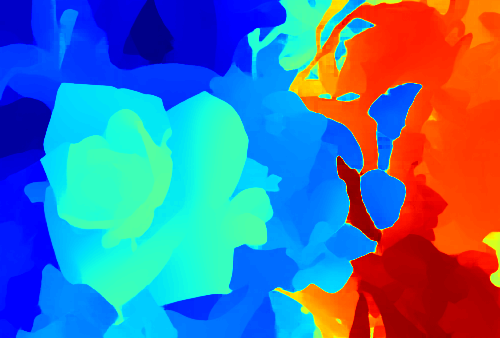

True

In [38]:
import cv2
from google.colab.patches import cv2_imshow

'''
Rotate left and right input images
'''
left_img = cv2.imread("/content/RAFT-Stereo/img/roses_L.png")
rotated_left_img = left_img[:, ::-1]
# cv2_imshow(rotated_left_img)
cv2.imwrite("img/roses_L_rotated.png", rotated_left_img)

right_img = cv2.imread("/content/RAFT-Stereo/img/roses_R.png")
rotated_right_img = right_img[:, ::-1]
# cv2_imshow(rotated_right_img)
cv2.imwrite("img/roses_R_rotated.png", rotated_right_img)


'''
Generate rotated version of right disparity map
'''
!python demo.py --restore_ckpt raftstereo-middlebury.pth --corr_implementation alt --mixed_precision -l=img/roses_R_rotated.png -r=img/roses_L_rotated.png

'''
Correct orientation of right disparity map
'''
right_disp_rotated = cv2.imread("/content/RAFT-Stereo/demo_output/img.png")
# cv2_imshow(right_disp_rotated)
right_disp = right_disp_rotated[:, ::-1]
cv2_imshow(right_disp)
cv2.imwrite("demo_output/roses_right_disparity.png", right_disp)